<img src="https://raw.githubusercontent.com/saulocatharino/assistente_virtual/master/logobeetlabs.png" width=600>
<br><br>

<h1><b>MENTORIA PERSONALIZADA</b></h1><br>


---



## **CRIANDO DATASET** ##

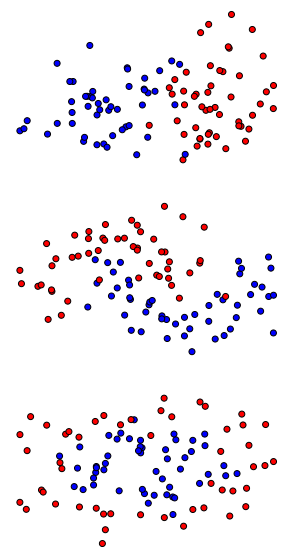

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)

X1 += 2 * rng.uniform(size=X1.shape)


X2, y2 = make_moons(noise=0.3, random_state=0)
X3, y3 = make_circles(noise=0.2, factor=0.5, random_state=1)


cores = ListedColormap(['#FF0000', '#0000FF'])

fig, ax = plt.subplots(3, figsize=(5,10))

ax[0].scatter(X1[:, 0],X1[:, 1],c=y1, cmap=cores, edgecolors='k')
ax[1].scatter(X2[:, 0],X2[:, 1],c=y2, cmap=cores, edgecolors='k')
ax[2].scatter(X3[:, 0],X3[:, 1],c=y3, cmap=cores, edgecolors='k')


ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()


plt.show()


datasets = [(X1, y1), (X2,y2), (X3,y3)]

In [ ]:
X3

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973],
       [ 0.231206  , -0.53275899],
       [ 0.15623875, -0.8678088 ],
       [ 0.51647541,  0.48940995],
       [ 0.68707007, -0.02334129],
       [ 0.54759869, -0.16482373],
       [-0.32179572, -0.80553536],
       [-1.07478639, -0.733362  ],
       [ 0.76758455, -0.43498783],
       [-0.47475234, -0.33813186],
       [ 0.15420656,  1.07306032],
       [ 0.65916696,  0.20773634],
       [-0.77795003,  0.1326555 ],
       [ 0.47025454, -0.31228748],
       [-0.04246799,  0.26555446],
       [-0.72405954,  0.48807185],
       [-0.36960005, -1.06514028],
       [ 0.17833327, -0.49718972],
       [-0.93927864, -0.41951638],
       [ 0.50914152,

## **NEAREST NEIGHBORS**##

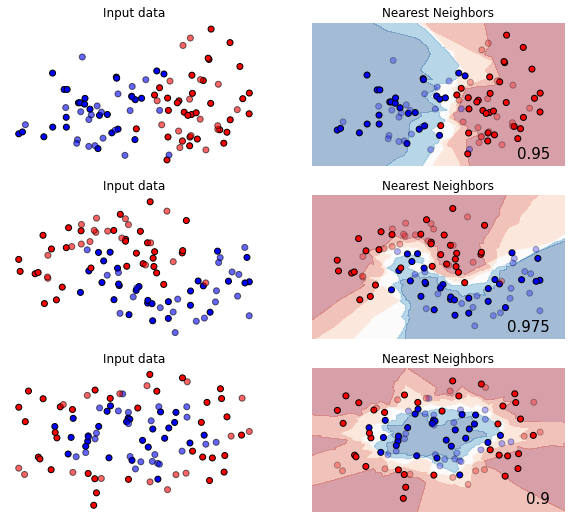

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

name = "Nearest Neighbors"
clf = KNeighborsClassifier(3) 



figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **MLP CLASSIFIER** ##

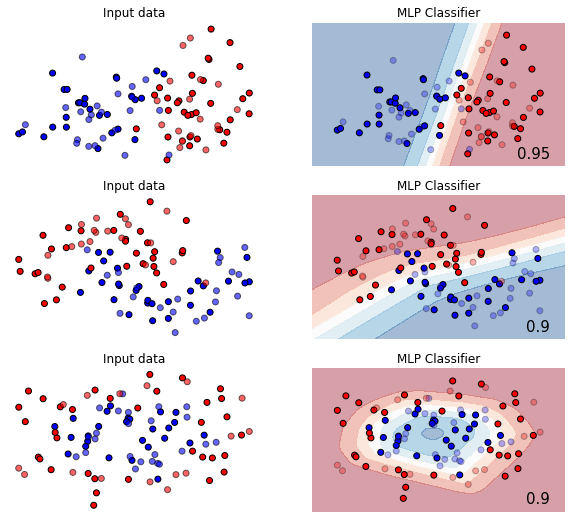

In [ ]:
from sklearn.neural_network import MLPClassifier

name = "MLP Classifier"
clf = MLPClassifier(alpha=1, max_iter=2000)



figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **SVC LINEAR**##

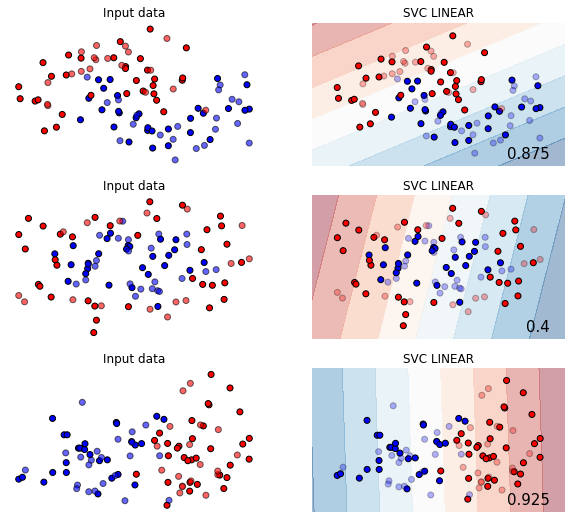

In [ ]:
from sklearn.svm import SVC

name = "SVC LINEAR"
clf = SVC(kernel="linear", C=0.025)




figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **RBF SVC**##

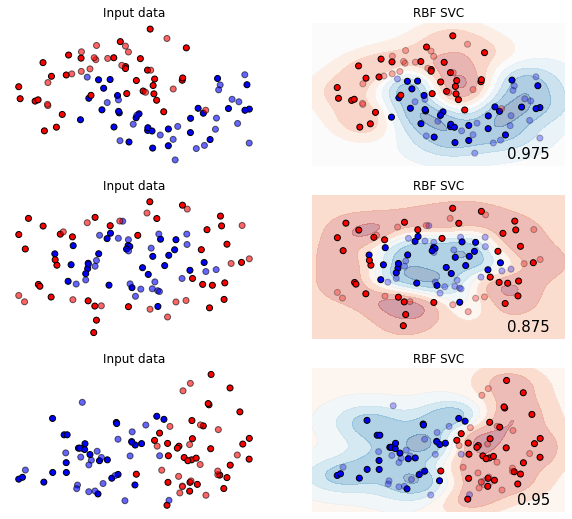

In [ ]:
from sklearn.svm import SVC

name = "RBF SVC"
clf = SVC(gamma=2, C=1)




figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **DECISION TREE**##

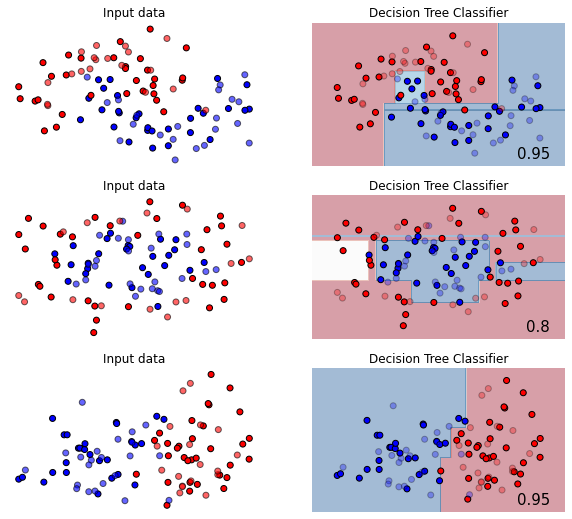

In [ ]:
from sklearn.tree import DecisionTreeClassifier

name = "Decision Tree Classifier"
clf = DecisionTreeClassifier(max_depth=5)



figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **GAUSSIAN NAIVE BAYES**##

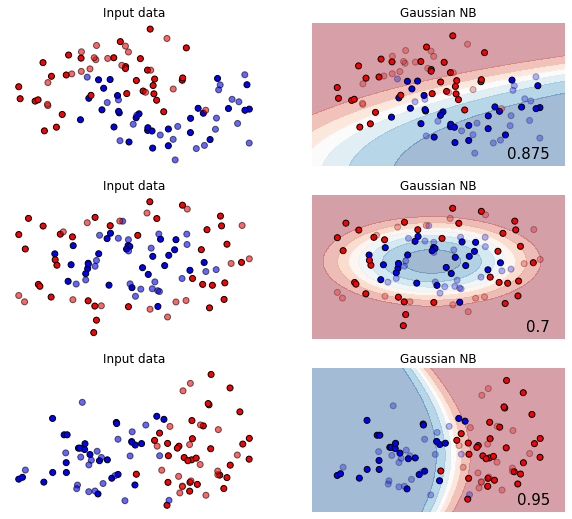

In [ ]:
from sklearn.naive_bayes import GaussianNB

name = "Gaussian NB"
clf = GaussianNB()



figure = plt.figure(figsize=(10, 9))
# Cria cores para a plotagem
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Index da plotagem inicial para o loopíng 
i = 1

# Looping para executar um dataset por vez
for ds in datasets:

    # Pre-processamento do dataset
    X, y = ds

    # Aplica normalização ao X
    X = StandardScaler().fit_transform(X)

    # Divide o dataset em partes para treinamento e teste
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)


    # Função para criar o gradiente de cores da grade
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


    ax = plt.subplot(3, 1 + 1, i)
    ax.set_title("Input data")

    # Plotagem de pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_axis_off()

    i += 1


    ax = plt.subplot(3, 2, i)
    ax.set_axis_off()

    # Treina modelo no dataset atual
    clf.fit(X_train, y_train)

    # Calcula precisão do modelo
    score = clf.score(X_test, y_test)


    # Calcula a probabilidade de cada ponto da predição
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Converte a probabilidade no gradiente de cores
    Z = Z.reshape(xx.shape)

    # Plotagem da grade de probabilidade
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)

    # Plotagem dos pontos usados no treinamento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    
    # Plotagem dos pontos usados no teste
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    # Adiciona título à plotagem
    ax.set_title(name)

    # Adiciona texto com a precisão do modelo no canto inferior direito
    ax.text(xx.max() - .3, yy.min() + .3, ('{}'.format(score)),  size=15, horizontalalignment='right')
    i += 1

plt.show()

## **VÁRIOS MODELOS EM COMPARAÇÃO**##

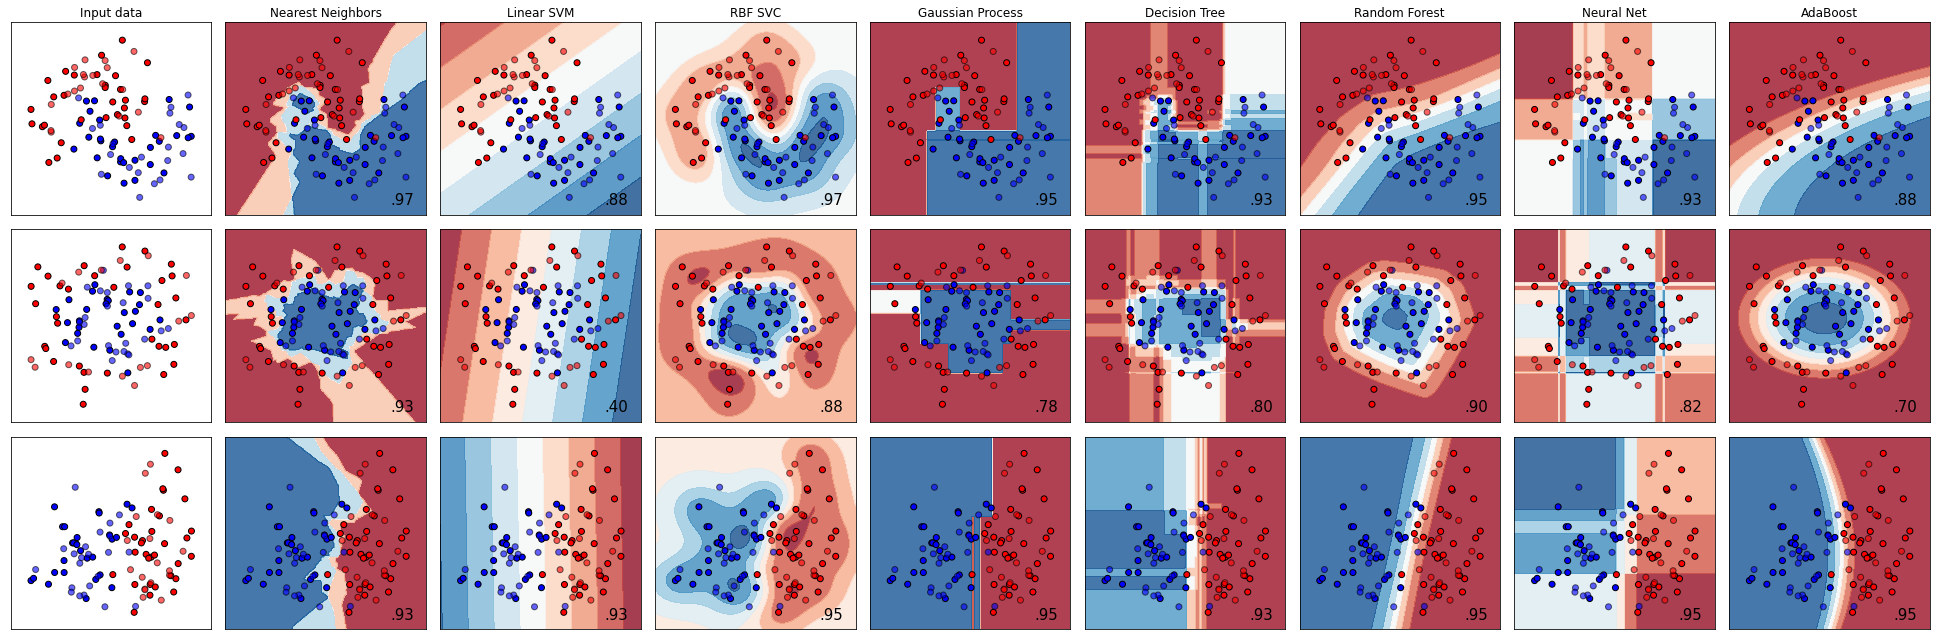

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVC", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "GPC"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()] 

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()